# Explore here

In [8]:
import os
import pandas as pd
import seaborn as sns
from dotenv import load_dotenv
import matplotlib.pyplot as plt

# load the .env file variables
load_dotenv()

# Get credential values
client_id = os.environ.get("CLIENT_ID")
client_secret = os.environ.get("CLIENT_SECRET")


In [9]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials


lz_uri = 'spotify:artist:4SsVbpTthjScTS7U2hmr1X'

spotify = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(client_id=client_id,client_secret=client_secret))
results = spotify.artist_top_tracks(lz_uri)

In [10]:
canciones=[]
popularidad=[]
duracion=[]
for track in results['tracks'][:9]:
    print('track    : ' + track['name'])
    canciones.append(track['name'])
    popularidad.append(track['popularity'])
    duracion.append(track['duration_ms']/(1000*60)%60)
df=pd.DataFrame()
df['Canciones']=pd.DataFrame(canciones)
df['Popularidad']=pd.DataFrame(popularidad)
df['Duracion']=pd.DataFrame(duracion)
df.index +=1

track    : Pa' Que La Pases Bien
track    : Tu No Vive Asi (feat. Mambo Kingz & DJ Luian)
track    : La Jumpa
track    : Me Prefieres A Mi
track    : Si Se Da - Remix
track    : Hace Mucho Tiempo
track    : Me Ama Me Odia
track    : Pa las girlas (con DJ Urba) - Remix
track    : Por Vos


In [11]:
df

,Canciones,Popularidad,Duracion
1,Pa' Que La Pases Bien,81,3.568667
2,Tu No Vive Asi (feat. Mambo Kingz & DJ Luian),81,4.400000
3,La Jumpa,73,4.261550
4,Me Prefieres A Mi,78,3.260950
5,Si Se Da - Remix,78,5.537333
6,Hace Mucho Tiempo,66,2.855550
7,Me Ama Me Odia,77,5.448933
8,Pa las girlas (con DJ Urba) - Remix,77,4.337567
9,Por Vos,74,3.089900


In [12]:

tracks_df = pd.DataFrame(canciones)

print(tracks_df.head(3))

                                               0
0                          Pa' Que La Pases Bien
1  Tu No Vive Asi (feat. Mambo Kingz & DJ Luian)
2                                       La Jumpa


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 1 to 9
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Canciones    9 non-null      object 
 1   Popularidad  9 non-null      int64  
 2   Duracion     9 non-null      float64
dtypes: float64(1), int64(1), object(1)
memory usage: 348.0+ bytes


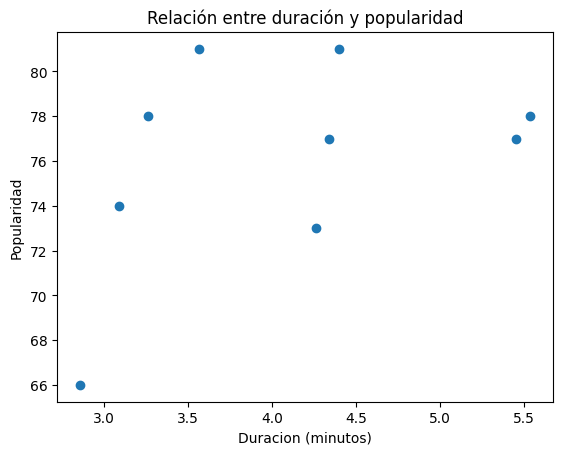

In [15]:
plt.scatter(df['Duracion'], df['Popularidad'])
plt.xlabel('Duracion (minutos)')
plt.ylabel('Popularidad')
plt.title('Relación entre duración y popularidad')
plt.show()